In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))
import jReversion as jR
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score
import networkx as nx
from statannot import add_stat_annotation

Matplotlib is building the font cache; this may take a moment.


In [2]:
#load data
# network_name_list= [Grieco, TLGLNetwork, bauer, ERBB, fibroblast, saez, BLT, colitis_jijoo, prostate]
# integrated_data = pd.DataFrame()
Model = jR.grieco()
BooleanRuleFileName = '../' + Model['BooleanRule_filename']
network_name = Model['network_name']

NumInputs = Model['num_inputs']
NumInputConditions = Model['num_input_conditions']

InputConditions = Model['input_conditions']

OutputNodes = Model['output_nodes']
InputNodes = Model['input_nodes']

# Set parameters
# Note the node name for Gread is the index (integer), one can encode the nodename by adding prefix and suffix
# If the node name from the input file is not this simple, one need to create a dictionary to record the mapping
Prefix, Suffix = 'n', 'n'

TempI = jR.initialize(BooleanRuleFileName, Prefix, Suffix)
Mapping = TempI['mapping']
InverseMapping = TempI['inverse_mapping']
GRead = TempI['Gread']
ReadNodes = TempI['read_nodes']
if Model['reduction_required']:
    GRead = BDOIp.Get_reduced_network(GRead)

CutOffRange = [3, 4, 5, 6, 7]
GRead.remove_edges_from(list(nx.selfloop_edges(GRead)))

integrated_data = pd.read_csv('../data/' + network_name + '_table_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')
# table_original_network = table_original_network.sort_values(by='node')
# ffl_test = pd.read_csv('../data/' + network_name + '_ffl_test.tsv', sep='\t').sort_values(by='node').set_index('node')
# canalizing_test = pd.read_csv('../data/' + network_name + '_canalizing_check_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')

#     print(table_original_network.head())
GLabel = nx.DiGraph()
GLabel.add_edges_from(GRead.edges())
GLabel = nx.relabel_nodes(GLabel, ReadNodes)
indegree_srs = pd.Series(nx.in_degree_centrality(GLabel))
#     indegree_srs = pd.Series(dict(GLabel.in_degree))
integrated_data['indegree'] = indegree_srs
outdegree_srs = pd.Series(nx.out_degree_centrality(GLabel))
#     outdegree_srs = pd.Series(dict(GLabel.out_degree))
integrated_data['outdegree'] = outdegree_srs
betweenness_srs = pd.Series(nx.betweenness_centrality(GLabel))
integrated_data['betweenness'] = betweenness_srs
closeness_srs = pd.Series(nx.closeness_centrality(GLabel))
integrated_data['closeness'] = closeness_srs
katz_srs = pd.Series(nx.katz_centrality(GLabel))
integrated_data['katz'] = katz_srs
integrated_data['network'] = network_name
integrated_data.reset_index(inplace=True)
#     print(table_original_network.head())

In [3]:
#load data
# network_name_list= [Grieco, TLGLNetwork, bauer, ERBB, fibroblast, saez, BLT, colitis_jijoo, prostate]
# integrated_data = pd.DataFrame()
networkModel = [jR.tlgl(), jR.bauer(), jR.erbb(), jR.fibroblast(), jR.saez(), jR.blt(), jR.colitis_jijoo()]
# networkModel = [jR.grieco()]
for Model in networkModel:
#     Model = jR.grieco()
    BooleanRuleFileName = '../' + Model['BooleanRule_filename']
    network_name = Model['network_name']

    NumInputs = Model['num_inputs']
    NumInputConditions = Model['num_input_conditions']

    InputConditions = Model['input_conditions']

    OutputNodes = Model['output_nodes']
    InputNodes = Model['input_nodes']

    # Set parameters
    # Note the node name for Gread is the index (integer), one can encode the nodename by adding prefix and suffix
    # If the node name from the input file is not this simple, one need to create a dictionary to record the mapping
    Prefix, Suffix = 'n', 'n'

    TempI = jR.initialize(BooleanRuleFileName, Prefix, Suffix)
    Mapping = TempI['mapping']
    InverseMapping = TempI['inverse_mapping']
    GRead = TempI['Gread']
    ReadNodes = TempI['read_nodes']
    if Model['reduction_required']:
        GRead = BDOIp.Get_reduced_network(GRead)

    CutOffRange = [3, 4, 5, 6, 7]
    GRead.remove_edges_from(list(nx.selfloop_edges(GRead)))

    table_original_network = pd.read_csv('../data/' + network_name + '_table_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')
    # table_original_network = table_original_network.sort_values(by='node')
    # ffl_test = pd.read_csv('../data/' + network_name + '_ffl_test.tsv', sep='\t').sort_values(by='node').set_index('node')
    # canalizing_test = pd.read_csv('../data/' + network_name + '_canalizing_check_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')

#     print(table_original_network.head())
    GLabel = nx.DiGraph()
    GLabel.add_edges_from(GRead.edges())
    GLabel = nx.relabel_nodes(GLabel, ReadNodes)
    indegree_srs = pd.Series(nx.in_degree_centrality(GLabel))
#     indegree_srs = pd.Series(dict(GLabel.in_degree))
    table_original_network['indegree'] = indegree_srs
    outdegree_srs = pd.Series(nx.out_degree_centrality(GLabel))
#     outdegree_srs = pd.Series(dict(GLabel.out_degree))
    table_original_network['outdegree'] = outdegree_srs
    betweenness_srs = pd.Series(nx.betweenness_centrality(GLabel))
    table_original_network['betweenness'] = betweenness_srs
    closeness_srs = pd.Series(nx.closeness_centrality(GLabel))
    table_original_network['closeness'] = closeness_srs
    katz_srs = pd.Series(nx.katz_centrality(GLabel))
    table_original_network['katz'] = katz_srs
    table_original_network['network'] = network_name
    table_original_network.reset_index(inplace=True)
    integrated_data = pd.concat([integrated_data, table_original_network], ignore_index=True)
#     print(table_original_network.head())

In [4]:
#cell collective
networkModel = ['BT474', 'CD4_T', 'death_receptor', 'bortezomib', 'lymphoid']

for Model in networkModel:
    Prefix, Suffix = 'n', 'n'
    TEMP = jR.cellcollective(Model, Prefix, Suffix, directory='../')

    BooleanRuleFileName = TEMP['BooleanRule_filename']
    network_name = TEMP['network_name']

    NumInputs = TEMP['num_inputs']
    NumInputConditions = TEMP['num_input_conditions']

    InputConditions = TEMP['input_conditions']

    OutputNodes = TEMP['output_nodes']
    InputNodes = TEMP['input_nodes']
    
    Mapping = TEMP['mapping']
    InverseMapping = TEMP['inverse_mapping']
    GRead = TEMP['Gread']
    ReadNodes = TEMP['read_nodes']
    
#     CutOffRange = [3, 4, 5, 6, 7]
    GRead.remove_edges_from(list(nx.selfloop_edges(GRead)))

    table_original_network = pd.read_csv('../data/' + network_name + '_table_for_original_network.tsv', sep='\t').sort_values(by='node').set_index('node')
    
    GLabel = nx.DiGraph()
    GLabel.add_edges_from(GRead.edges())
    GLabel = nx.relabel_nodes(GLabel, ReadNodes)
    indegree_srs = pd.Series(nx.in_degree_centrality(GLabel))
#     indegree_srs = pd.Series(dict(GLabel.in_degree))
    table_original_network['indegree'] = indegree_srs
    outdegree_srs = pd.Series(nx.out_degree_centrality(GLabel))
#     outdegree_srs = pd.Series(dict(GLabel.out_degree))
    table_original_network['outdegree'] = outdegree_srs
    betweenness_srs = pd.Series(nx.betweenness_centrality(GLabel))
    table_original_network['betweenness'] = betweenness_srs
    closeness_srs = pd.Series(nx.closeness_centrality(GLabel))
    table_original_network['closeness'] = closeness_srs
    katz_srs = pd.Series(nx.katz_centrality(GLabel))
    table_original_network['katz'] = katz_srs
    table_original_network['network'] = network_name
    table_original_network.reset_index(inplace=True)
    integrated_data = pd.concat([integrated_data, table_original_network], ignore_index=True)
    
    

In [5]:
print(integrated_data.head())

   node Class  Canalizing  UnreachableEffective   FFL3   FFL4   FFL5   FFL6  \
0   AKT    C1        True                  True  False  False  False  False   
1   AP1    C1        True                 False  False  False  False  False   
2  ATF2    C0       False                 False   True   True   True   True   
3   ATM    C0       False                 False  False  False  False  False   
4  BCL2    C1        True                  True   True   True   True   True   

    FFL7  FBL  indegree  outdegree  betweenness  closeness      katz network  \
0  False    0  0.038462   0.115385     0.126533   0.176210  0.134237  Grieco   
1  False    0  0.057692   0.019231     0.094583   0.191834  0.152510  Grieco   
2   True    0  0.038462   0.019231     0.013889   0.173077  0.143403  Grieco   
3  False    0  0.019231   0.038462     0.016968   0.019231  0.120262  Grieco   
4   True    0  0.038462   0.019231     0.001948   0.188390  0.135076  Grieco   

  FFL2  
0  NaN  
1  NaN  
2  NaN  
3  NaN  

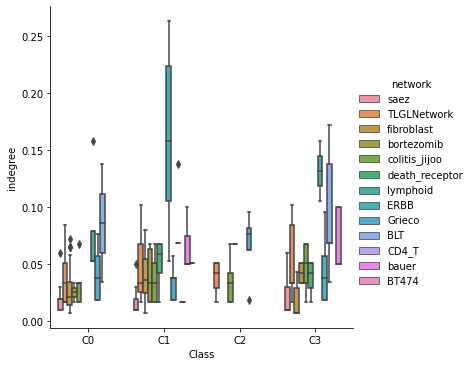

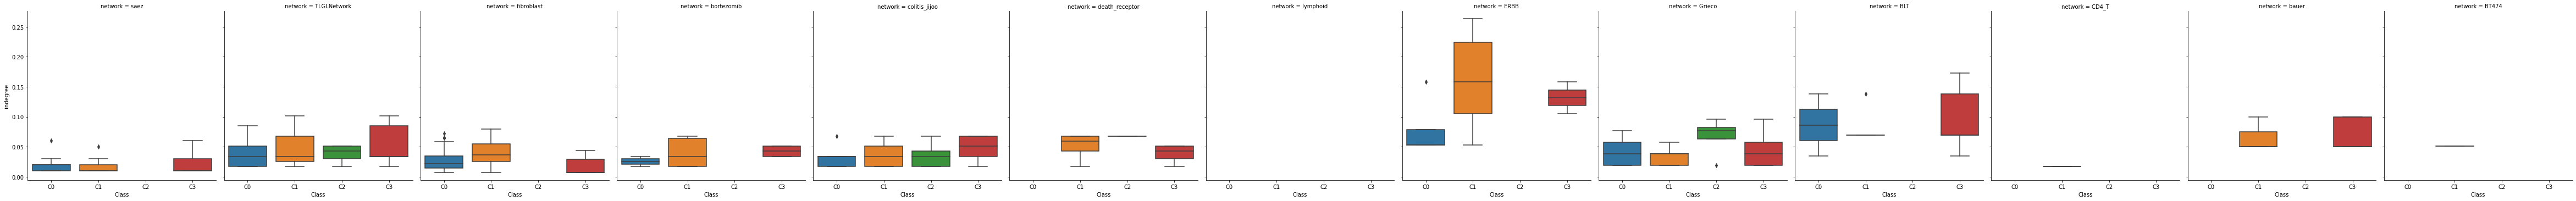

In [6]:
# f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
# plt.figure(figsize=(30,5))
sns.catplot(x='Class', y='indegree', data=integrated_data.sort_values('network').sort_values('Class'), hue='network', kind='box')
sns.catplot(x='Class', y='indegree', data=integrated_data.sort_values('network').sort_values('Class'), col='network', kind='box')

# f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True, sharey=True)
# g = sns.distplot(table_original_network[table_original_network['Class']=='C0']['indegree'], ax=axes[0,0], kde=False)
# g = sns.distplot(table_original_network[table_original_network['Class']=='C1']['indegree'], ax=axes[0,1])
# g = sns.distplot(table_original_network[table_original_network['Class']=='C2']['indegree'], ax=axes[1,0])
# g = sns.distplot(table_original_network[table_original_network['Class']=='C3']['indegree'], ax=axes[1,1])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

C0 v.s. C1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.052e-03 U_stat=8.672e+03
C1 v.s. C2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.261e+03
C2 v.s. C3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.202e+03
C0 v.s. C2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.261e-01 U_stat=1.192e+03
C1 v.s. C3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.577e+03
C0 v.s. C3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.221e-02 U_stat=7.911e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

C0 v.s. C1: 

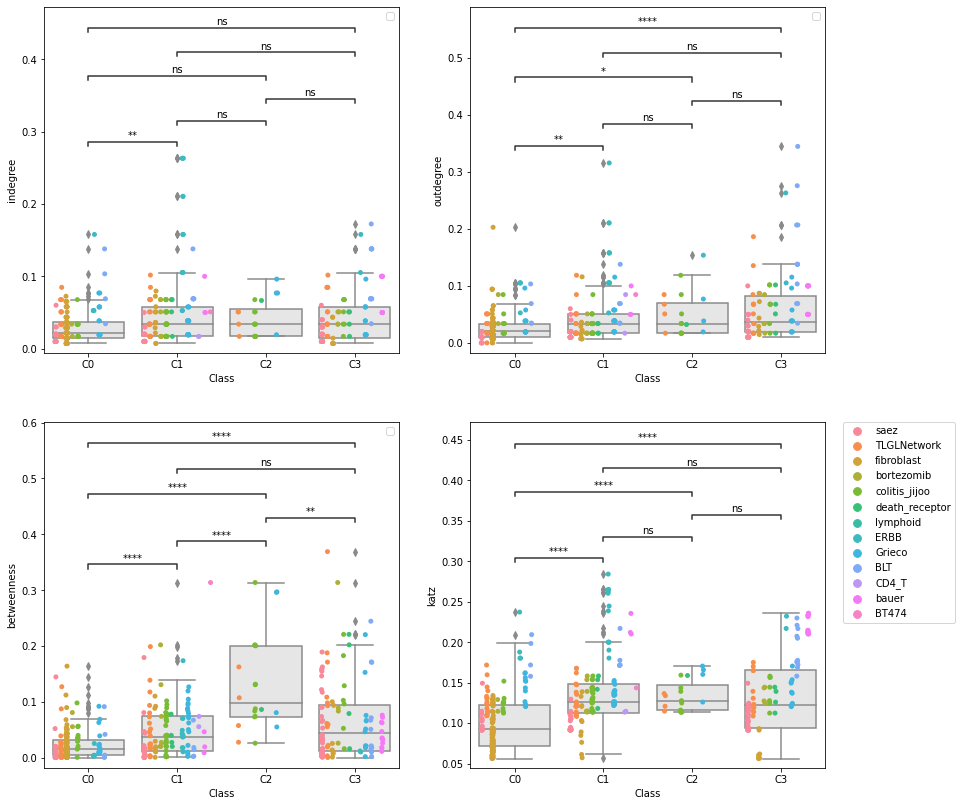

In [7]:
f, axes = plt.subplots(2, 2, figsize=(14, 14))
full_box_pairs =[("C0", "C1"), ("C0", "C2"), ("C0", "C3"), ("C1", "C2"), ("C1", "C3"), ("C2", "C3")]
sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='indegree', hue='network', ax=axes[0,0], dodge=True, jitter=True)
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='indegree', color='.9', ax=axes[0,0])
add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='indegree',
                    box_pairs=full_box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='outdegree', hue='network', ax=axes[0,1], dodge=True, jitter=True)
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='outdegree', color='.9', ax=axes[0,1])
add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='outdegree',
                    box_pairs=full_box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='betweenness', hue='network', ax=axes[1,0], dodge=True, jitter=True)
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='betweenness', color='.9', ax=axes[1,0])
add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='betweenness',
                    box_pairs=full_box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='katz', hue='network', ax=axes[1,1], dodge=True, jitter=True)
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='katz', color='.9', ax=axes[1,1])

add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='katz',
                    box_pairs=full_box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

handles, labels = ax.get_legend_handles_labels()
length_label = len(labels)
l = plt.legend(handles[length_label-13:length_label], labels[length_label-13:length_label], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0,0].legend(handles[:0], labels[:0])
axes[0,1].legend(handles[:0], labels[:0])
axes[1,0].legend(handles[:0], labels[:0])
# axes[0,1].legend(handles[:0], labels[:0])

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

C0 v.s. C1: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.052e-03 U_stat=8.672e+03
C1 v.s. C2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.261e+03
C2 v.s. C3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.202e+03
C0 v.s. C2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.261e-01 U_stat=1.192e+03
C1 v.s. C3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.577e+03
C0 v.s. C3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.221e-02 U_stat=7.911e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

C0 v.s. C1: 

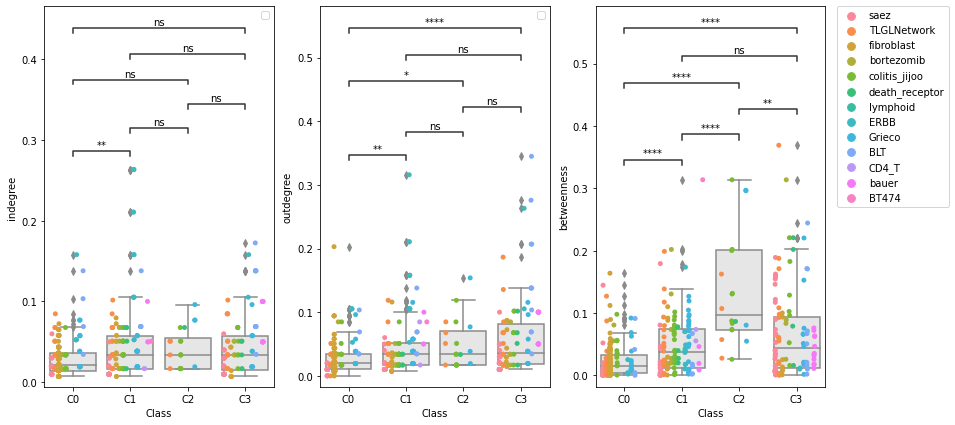

In [8]:
f, axes = plt.subplots(1, 3, figsize=(14, 7))
full_box_pairs =[("C0", "C1"), ("C0", "C2"), ("C0", "C3"), ("C1", "C2"), ("C1", "C3"), ("C2", "C3")]
sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='indegree', hue='network', ax=axes[0], dodge=True)
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='indegree', color='.9', ax=axes[0])
add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='indegree',
                    box_pairs=full_box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='outdegree', hue='network', ax=axes[1], dodge=True)
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='outdegree', color='.9', ax=axes[1])
add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='outdegree',
                    box_pairs=full_box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='betweenness', hue='network', ax=axes[2], dodge=True)
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='betweenness', color='.9', ax=axes[2])
add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='betweenness',
                    box_pairs=full_box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
# sns.stripplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='katz', hue='network', ax=axes[1,1])
# ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='katz', color='.9', ax=axes[1,1])

# add_stat_annotation(ax=ax, data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='katz',
#                     box_pairs=full_box_pairs,
#                     test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

handles, labels = ax.get_legend_handles_labels()

l = plt.legend(handles[length_label-13:length_label], labels[length_label-13:length_label], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0].legend(handles[:0], labels[:0])
axes[1].legend(handles[:0], labels[:0])
# axes[1,0].legend(handles[:0], labels[:0])
# axes[0,1].legend(handles[:0], labels[:0])

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(14, 7), sharex=True)
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='indegree', hue='network', ax=axes[0])
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='outdegree', hue='network', ax=axes[1])
ax = sns.boxplot(data=integrated_data.sort_values('network').sort_values('Class'), x='Class', y='betweenness', hue='network', ax=axes[2])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:], ['fibroblast', 'coad', 'tcell', 'blca', 'tlgl', 'erbb', 'blt', 'angio'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes[0].legend(handles[:0], labels[:0])
axes[1].legend(handles[:0], labels[:0])

In [ ]:
sns.catplot(x='Class', y='outdegree', data=integrated_data.sort_values('network').sort_values('Class'), hue='network', kind='box')
sns.catplot(x='Class', y='outdegree', data=integrated_data.sort_values('network').sort_values('Class'), col='network', kind='box')


In [ ]:
sns.catplot(x='Class', y='betweenness', data=integrated_data.sort_values('network').sort_values('Class'), hue='network', kind='box')
sns.catplot(x='Class', y='betweenness', data=integrated_data.sort_values('network').sort_values('Class'), col='network', kind='box')


In [ ]:
sns.catplot(x='Class', y='closness', data=integrated_data.sort_values('network').sort_values('Class'), hue='network', kind='box')
sns.catplot(x='Class', y='closness', data=integrated_data.sort_values('network').sort_values('Class'), col='network', kind='box')


In [ ]:
sns.catplot(x='outdegree', col='Class', data=table_original_network.sort_values('Class'), kind='count')

In [ ]:
print(table_original_network.loc[table_original_network['Class']=='C0']['indegree'].mean())
print(table_original_network.loc[table_original_network['Class']=='C1']['indegree'].mean())
print(table_original_network.loc[table_original_network['Class']=='C2']['indegree'].mean())
print(table_original_network.loc[table_original_network['Class']=='C3']['indegree'].mean())

print(table_original_network.loc[table_original_network['Class']=='C0']['outdegree'].mean())
print(table_original_network.loc[table_original_network['Class']=='C1']['outdegree'].mean())
print(table_original_network.loc[table_original_network['Class']=='C2']['outdegree'].mean())
print(table_original_network.loc[table_original_network['Class']=='C3']['outdegree'].mean())

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
g = sns.distplot(table_original_network[table_original_network['Class']=='C0']['betweenness'], ax=axes[0,0])
g.set_title('C0')
g = sns.distplot(table_original_network[table_original_network['Class']=='C1']['betweenness'], ax=axes[0,1])
g.set_title('C1')
g = sns.distplot(table_original_network[table_original_network['Class']=='C2']['betweenness'], ax=axes[1,0])
g.set_title('C2')
g = sns.distplot(table_original_network[table_original_network['Class']=='C3']['betweenness'], ax=axes[1,1])
g.set_title('C3')

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
g = sns.distplot(table_original_network[table_original_network['Class']=='C0']['closness'], ax=axes[0,0])
g.set_title('C0')
g = sns.distplot(table_original_network[table_original_network['Class']=='C1']['closness'], ax=axes[0,1])
g.set_title('C1')
g = sns.distplot(table_original_network[table_original_network['Class']=='C2']['closness'], ax=axes[1,0])
g.set_title('C2')
g = sns.distplot(table_original_network[table_original_network['Class']=='C3']['closness'], ax=axes[1,1])
g.set_title('C3')

In [ ]:
# sns.catplot(x='FFL4', data=table_original_network.loc[table_original_network['Class']=='C3'], kind='count')

In [ ]:
# ffl_test = pd.read_csv('../data/' + network_name + '_ffl_test.tsv', sep='\t').sort_values(by='node')
# ffl_test_reshape = pd.melt(ffl_test, id_vars='node').set_index('node')
# print(ffl_test_reshape.head())
# test = table_original_network.join(ffl_test_reshape, how='left')
# print(test.head())

In [ ]:
# sns.catplot(x='Class', data=test, hue='value', col='variable', kind='count', col_wrap=3)

In [ ]:
# sns.catplot(x='value', data=test, hue='Class', col='variable', kind='count', col_wrap=3)
